In [1]:
import numpy as np
import pandas as pd

In [2]:
# Cargar el archivo .npy
datos = np.load('proyecto_training_data.npy')
datosdf = pd.DataFrame(datos)
datosdf.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

datosdf

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [3]:
tamanio =len(datosdf) 
# Separar los datos entrenamiento (80%) 
tam_entrenamiento = int(0.8 * tamanio)

# validación y pruebas (20%)
tam_validacionpruebas = tamanio - tam_entrenamiento

datos_entrenamiento = datos[:tam_entrenamiento]
datos_validacionpruebas = datos[tam_entrenamiento:]

DFEntrenamiento = pd.DataFrame(datos_entrenamiento)
DFEntrenamiento.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

DFPRUEBAS = pd.DataFrame(datos_validacionpruebas)
DFPRUEBAS.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

print("Tamaño Total")
print(tamanio)
print("Tamaño entrenamiento 80%")
print(tam_entrenamiento)
print("Tamaño validacion y pruebas (20%) ")
print(tam_validacionpruebas)
print("------------------------------")
print("Datos de entrenamiento:")
print(DFEntrenamiento)
print("Datos de validación y pruebas :")
print(DFPRUEBAS)

Tamaño Total
1460
Tamaño entrenamiento 80%
1168
Tamaño validacion y pruebas (20%) 
292
------------------------------
Datos de entrenamiento:
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   1730

In [4]:
Media = DFEntrenamiento.mean(axis=0)
ValorMaximo = DFEntrenamiento.max(axis=0)
ValorMinimo = DFEntrenamiento.min(axis=0)
Rango = DFEntrenamiento.ndim
DesviacionEstandar = DFEntrenamiento.std(axis=0)

Res = ({'Media':pd.Series(Media,dtype=float),'Valor Maximo':pd.Series(ValorMaximo,dtype=float), 
        'Valor Minimo':pd.Series(ValorMinimo,dtype=float), 'Rango':pd.Series(Rango,dtype=float),
       'Desviacion Estandar':pd.Series(DesviacionEstandar,dtype=float)})
dfRes = pd.DataFrame(Res)
dfRes

,Media,Valor Maximo,Valor Minimo,Rango,Desviacion Estandar
0,NaN,NaN,NaN,2.0,NaN
1stFlrSF,1156.323630,3228.0,334.0,NaN,373.780374
LotFrontage,69.946985,313.0,21.0,NaN,23.478161
OverallQual,6.101027,10.0,1.0,NaN,1.378025
SalePrice,180590.277397,755000.0,34900.0,NaN,78815.697902
TotRmsAbvGrd,6.485445,14.0,2.0,NaN,1.609141
YearBuilt,1971.451199,2010.0,1875.0,NaN,29.951707


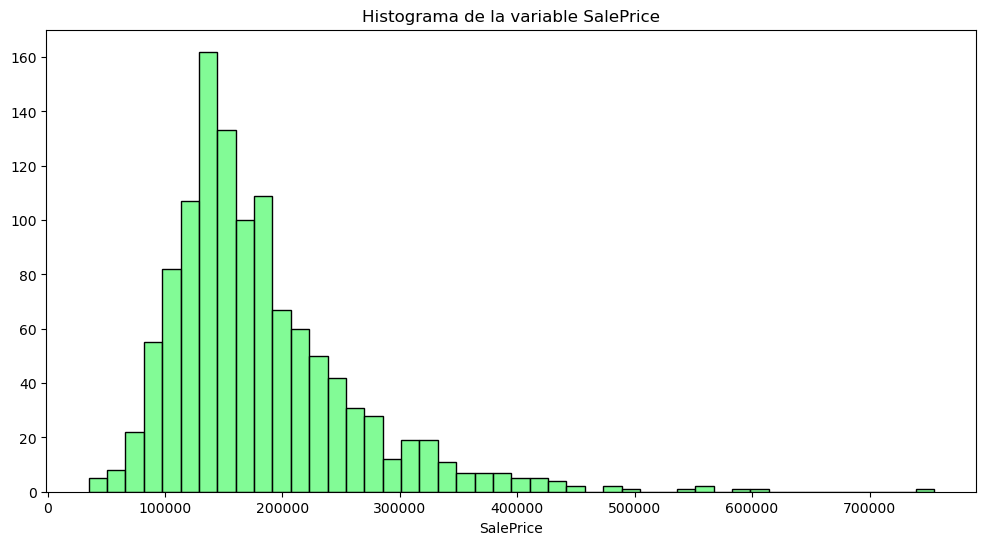

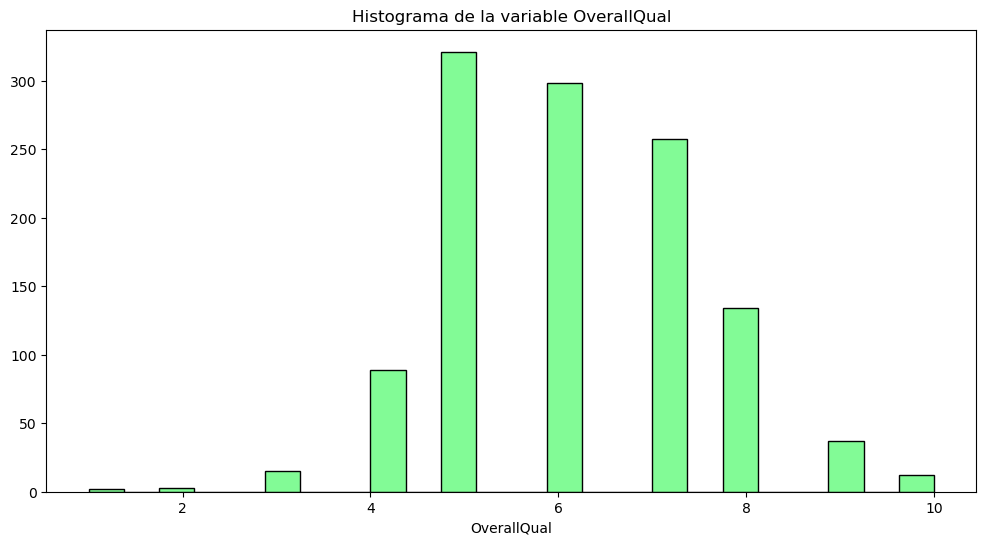

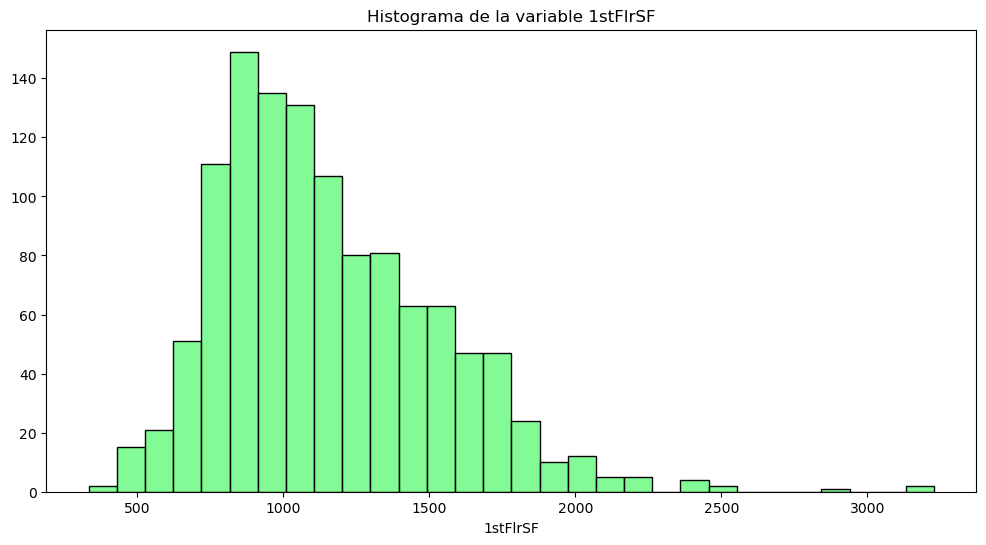

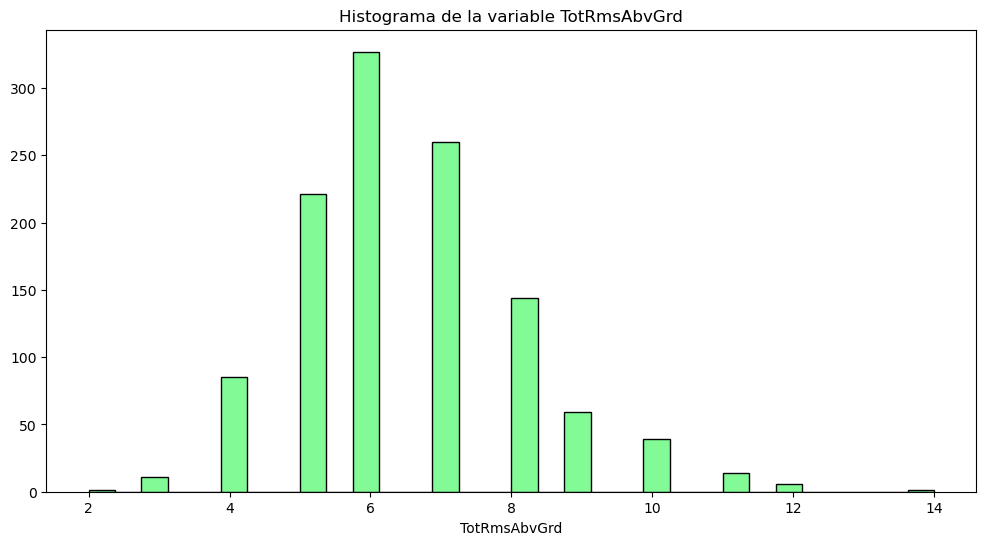

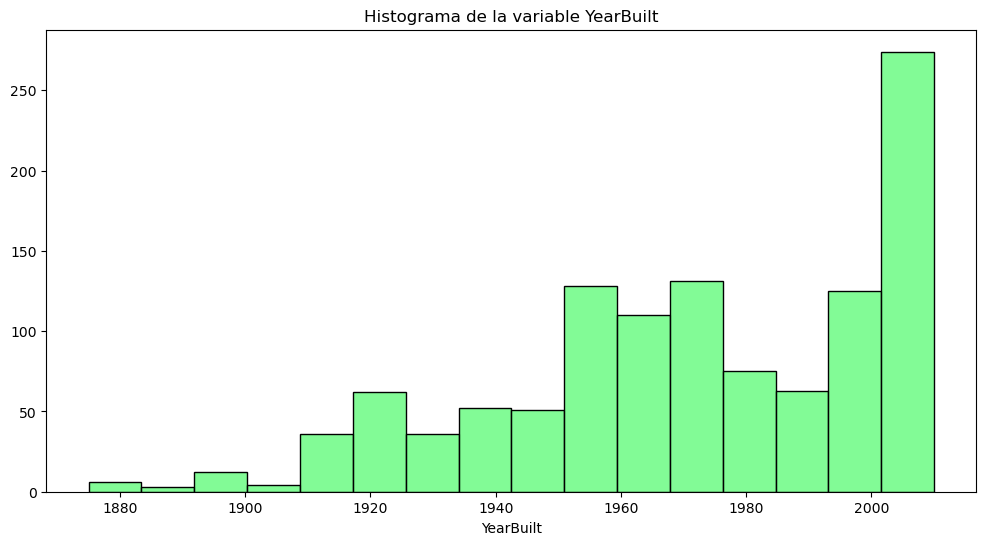

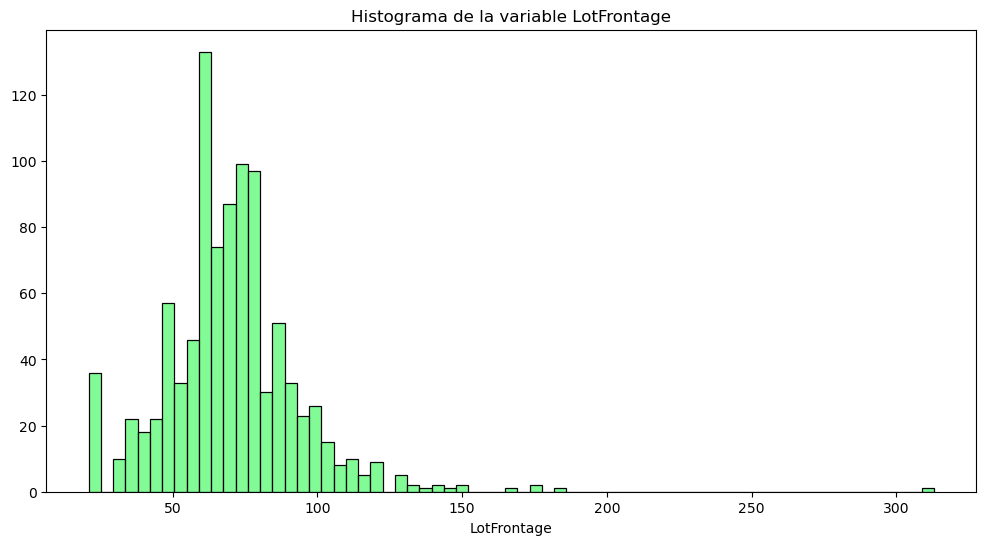

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in DFEntrenamiento.columns.values:
    
    plt.figure(figsize=(12, 6))
    sns.histplot(DFEntrenamiento[col],edgecolor='k',color="#58fa73")
    
    plt.title('Histograma de la variable ' + str(col))
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.show()

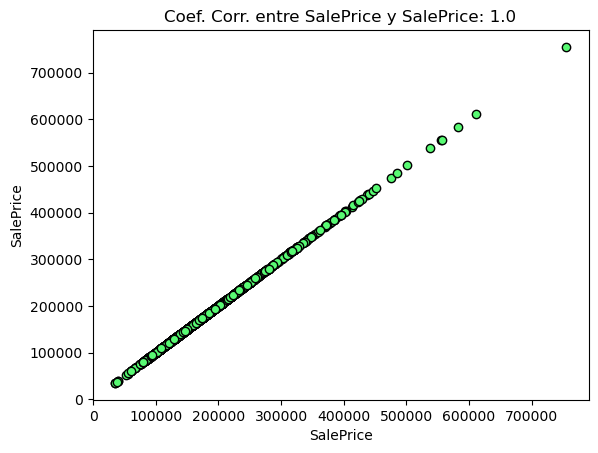

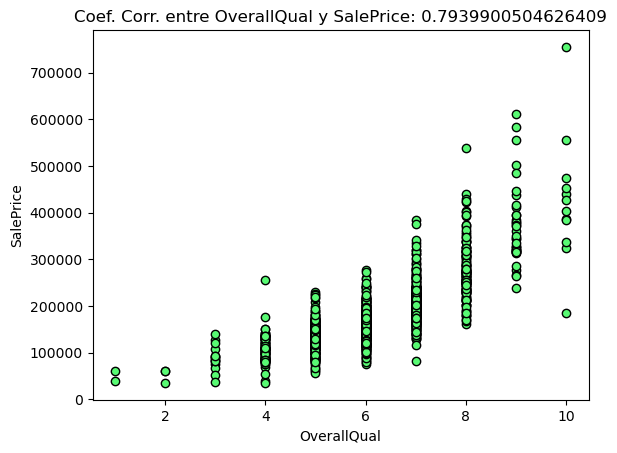

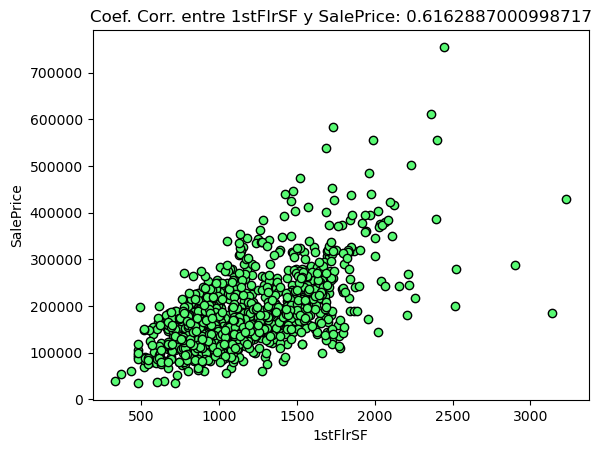

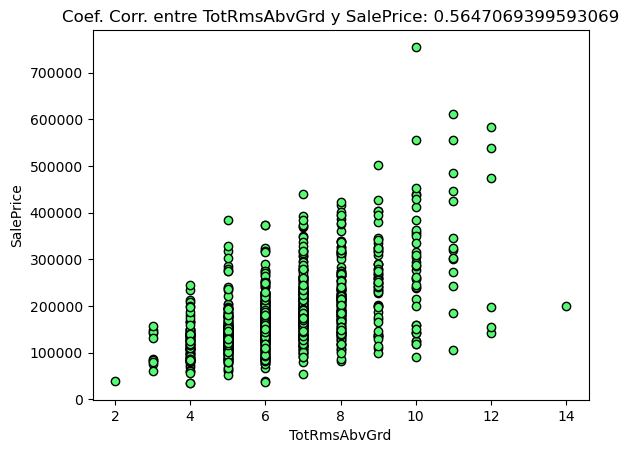

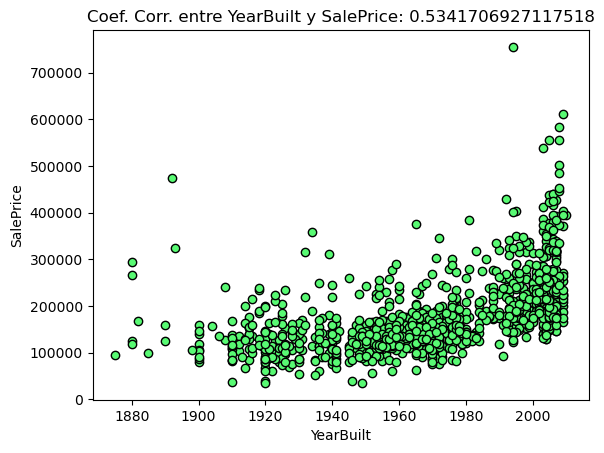

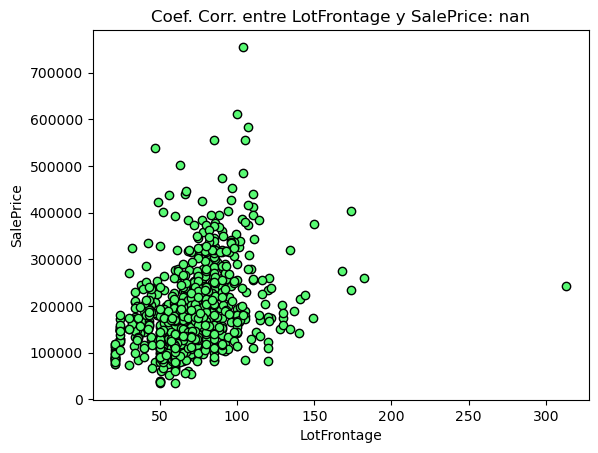

In [6]:

for col in DFEntrenamiento.columns.values:
    x = DFEntrenamiento[col]
    y = DFEntrenamiento['SalePrice']
    
    # Calcular el coeficiente de correlación entre x y y
    corr_coef_x1 = np.corrcoef(x, y)[0, 1]

    # Graficar scatterplot de x1 vs y
    plt.scatter(x, y,edgecolor='k',color="#58fa73")
    plt.title(f'Coef. Corr. entre {col} y SalePrice: {corr_coef_x1}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()
    

In [7]:
class regresion():
    
    def __init__(self,x, y, epochs, ImprimirErrorCada, alpha):
        
        self.x = x
        self.y = y
        self.epochs = epochs
        self.IEC = ImprimirErrorCada
        self.alpha = alpha
        self.beta0 = 0
        self.beta1 = 0
        self.errores = []
        self.modelo = {}
        self.V1 = np.ones_like(x).reshape(-1,1)
        self.VY = np.reshape(y,(-1,1))
        self.VX1 = np.hstack([np.reshape(x,(-1,1)),self.V1])
        self.betas = np.reshape([[self.beta0],[self.beta1]],(-1,1))
        
        for i in range(epochs):
            self.PredY = np.dot(self.VX1 ,self.betas)
            self.err = 1/(2*self.VY.shape[0]) * sum((self.VY - self.PredY)**2)
            self.errores.append(self.err[0])
            self.gra = np.reshape(alpha * (1/self.VY.shape[0]*sum((self.PredY - self.VY
                                                                 )*self.VX1)),(-1,1))
            self.betas = self.betas - self.gra 
            self.modelo[i] = [self.betas,self.PredY,self.VY,self.x]
        
            if i% self.IEC == 0:
                print("Iteracion: " + str(i))
                print("Error: " ,self.err)
                print("--------")
                
    def EntrModelo(self):
        return self.modelo , np.array(self.errores)
    
    @staticmethod
    def error(error):
        f1 = plt.figure(figsize=(12, 6))
        ax = f1.add_axes([0.02,0.02,0.6,0.6])
        ax.plot(error,color="#58fa73")
        ax.set_title("Errores modelo")
        ax.set_xlabel("No. iteraciones")
        ax.set_ylabel("Error")
        plt.show()
    
    @staticmethod
    def evolucion(modelo, n):
        
        for i in list(modelo.keys()):
            if i%round(n) == 0:
                f2 = plt.figure(figsize=(12, 6))
                ax2 = f2.add_axes([0.02,0.02,0.6,0.6])
                predY = modelo[i][1]
                Y = modelo[i][2]
                X = modelo[i][3]
                ax2.scatter(X,Y, edgecolor='k',color="#58fa73")
                ax2.plot(X,predY,linestyle='solid',color='r',label="Iteracion: " + str(i))
                ax2.set_title("Iteracion: " + str(i))
                ax2.legend()
                ax2.set_xlabel("X")
                ax2.set_ylabel("Y")
                plt.show()
    
    #@staticmethod
    def prediccion(self, M):
        self.M = M
        self.V1 = np.ones_like(self.M).reshape(-1,1)
        self.V1X = np.hstack([np.reshape(self.M,(-1,1)),self.V1])
        for i in range(self.epochs):
            self.Ypred = np.dot(self.V1X,self.betas)
        return self.Ypred
    
    @staticmethod
    def comparaprediccion(ModPropio, ModSklearn, Predecir, Modelo):
        MPropioRes = ModPropio.prediccion(Predecir.reshape(-1,1))
        MSklearnRes = ModSklearn.predict(Predecir.reshape(-1,1)) 
        Promedio = (MPropioRes + MSklearnRes)/2
        f3 = plt.figure(figsize=(12, 6))
        ax_3 = f3.add_axes([0.02, 0.02, 0.6, 0.6])
        
        for i in list(Modelo.columns.values):
            y = Modelo[i]
            ax_3.scatter(Predecir , y,edgecolor='k',color="#58fa73")
            ax_3.plot(Predecir, MPropioRes,color="#58fa73",label = 'Regresion: ')
            ax_3.plot(Predecir, MSklearnRes,color="#e3d23b", label = 'Msklearn: ')
            ax_3.plot(Predecir, Promedio, color="blue", label = 'Promedio: ')
            ax_3.set_title("Comparativa1")
            ax_3.legend()
            ax_3.set_xlabel("X")
            ax_3.set_ylabel('Y')
            plt.show()
        return MPropioRes, MSklearnRes, Promedio
    
    @staticmethod
    def comparaErrores(modelos, modelos2, prueba1, prueba2, set_prueba):
        labels = ['OverallQual', '1stFlrSF']
        ErrorRegresion = metrics.mean_squared_error(modelos[0], prueba1)
        ErrorMsklearn = metrics.mean_squared_error(modelos[1], prueba1)
        ErrorPromedio = metrics.mean_squared_error(modelos[2], prueba1)
        
        Error2Regresion = metrics.mean_squared_error(modelos2[0], prueba2)
        Error2Msklearn = metrics.mean_squared_error(modelos2[1], prueba2)
        Error2Promedio = metrics.mean_squared_error(modelos2[2], prueba2)
        
        ErroresRegresion = [ErrorRegresion,Error2Regresion]
        ErroresMsklearn = [ErrorMsklearn,Error2Msklearn]
        ErroresPromedio = [ErrorPromedio,Error2Promedio]
        
        T = np.arange(len(labels))
        fig_4 = plt.figure(figsize = (9,7))
        ax = fig_4.add_axes([0.01, 0.01, 0.6, 0.6])
        ax.set_xticks(T + 0.90/3)
        ax.set_xticklabels(labels)
        ax.bar(T, ErroresRegresion, width=0.30, edgecolor='k',color="#58fa73",label="Regresion")
        ax.bar(T + 0.30, ErroresMsklearn, width=0.30, edgecolor='k',color="#e3d23b",label="Msklearn")
        ax.bar(T + 0.60, ErroresPromedio, width=0.30, edgecolor='k',color="blue",label="Promedio")
        ax.legend()
        ax.set_title("Comparativa2")
        plt.show()

Iteracion: 0
Error:  [1.94097221e+10]
--------
Iteracion: 1000
Error:  [1.2430422e+09]
--------
Iteracion: 2000
Error:  [1.18419739e+09]
--------
Iteracion: 3000
Error:  [1.16137522e+09]
--------
Iteracion: 4000
Error:  [1.15252395e+09]
--------
Iteracion: 5000
Error:  [1.1490911e+09]
--------


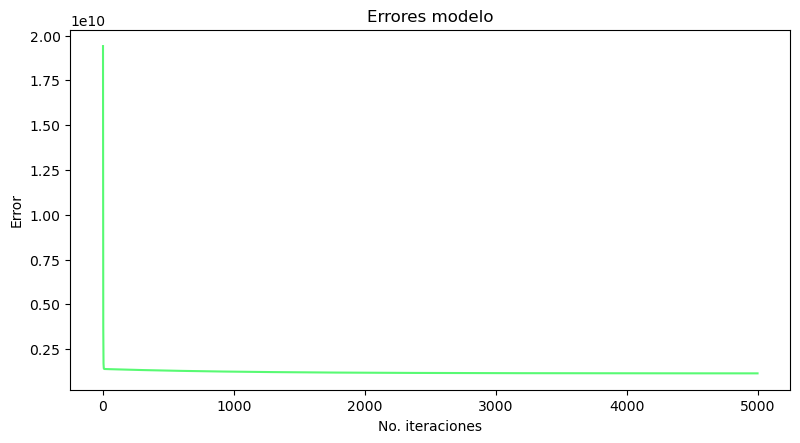

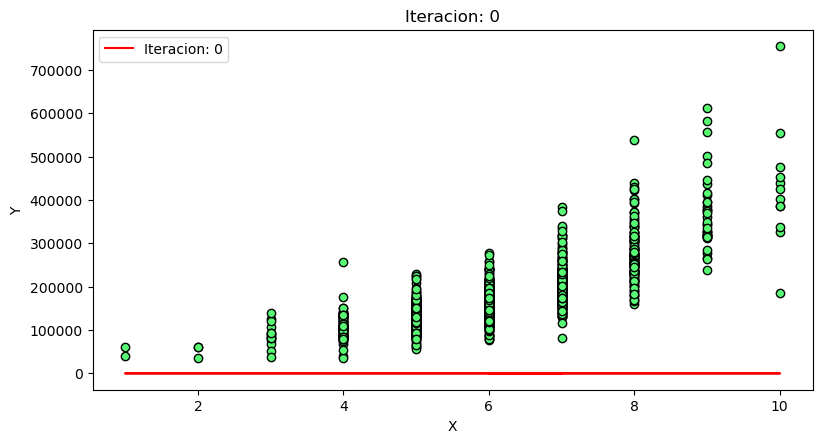

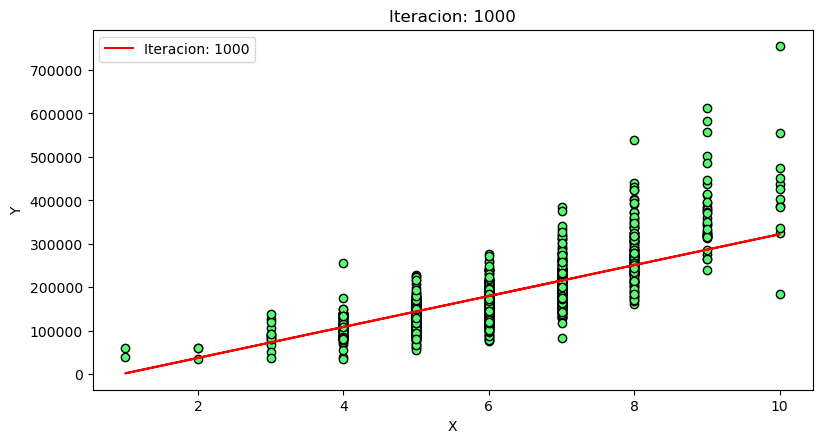

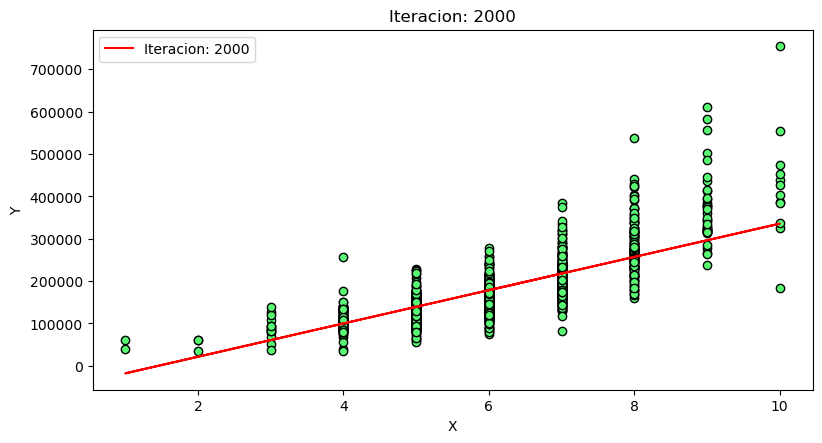

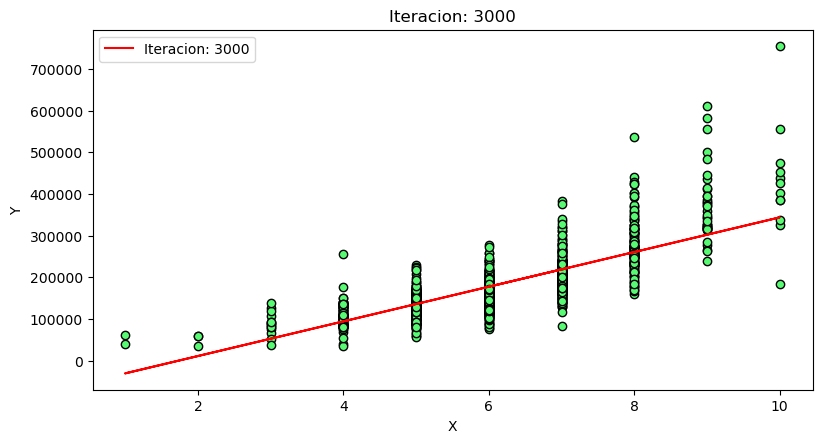

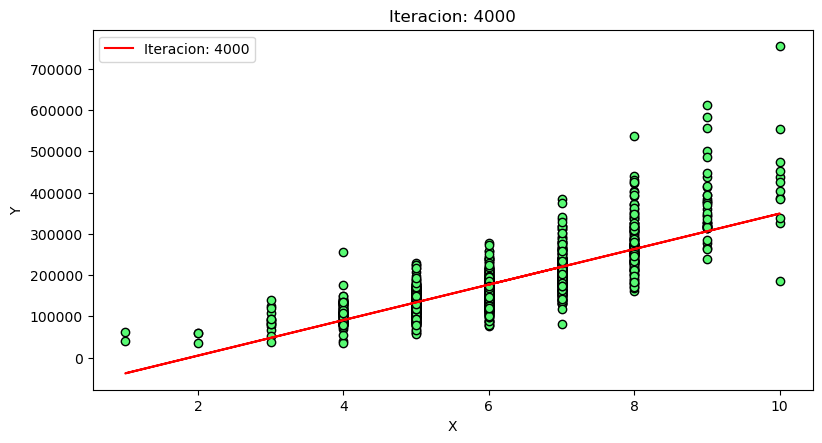

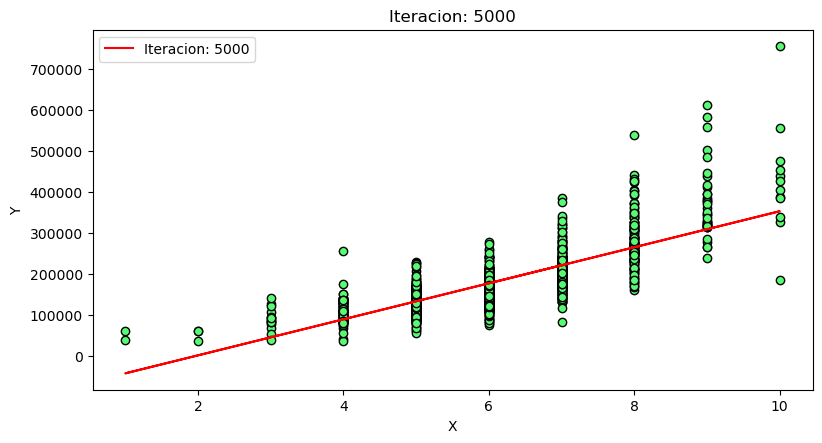

In [8]:
SalesP = np.reshape(np.array(DFEntrenamiento['SalePrice']),(-1,1))
OverallQual = np.reshape(np.array(DFEntrenamiento['OverallQual']),(-1,1))
FlrSF = np.reshape(np.array(DFEntrenamiento['1stFlrSF']),(-1,1))
Epoch = 5001
Imprimir = 1000
Escalar = 0.01

modelo1 = regresion(OverallQual,SalesP,Epoch,Imprimir,Escalar)
ResModel ,ResErrores = modelo1.EntrModelo()
regresion.error(ResErrores)
regresion.evolucion(ResModel,Imprimir)


Iteracion: 0
Error:  [1.94097221e+10]
--------
Iteracion: 10
Error:  [2.68220384e+09]
--------
Iteracion: 20
Error:  [1.99733083e+09]
--------
Iteracion: 30
Error:  [1.96929014e+09]
--------
Iteracion: 40
Error:  [1.96814207e+09]
--------
Iteracion: 50
Error:  [1.96809505e+09]
--------


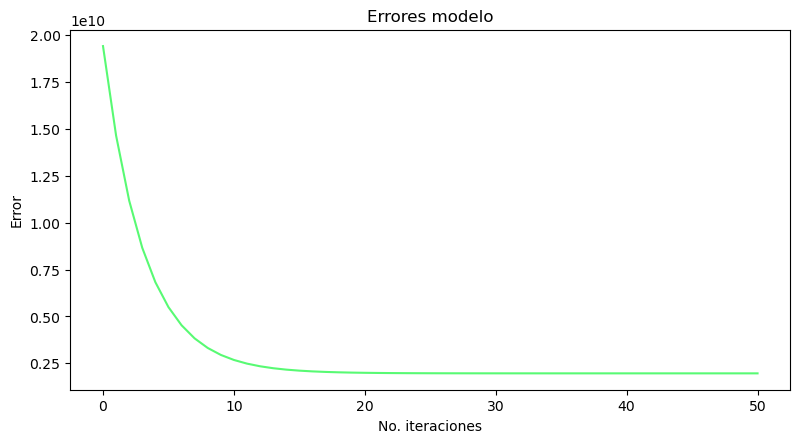

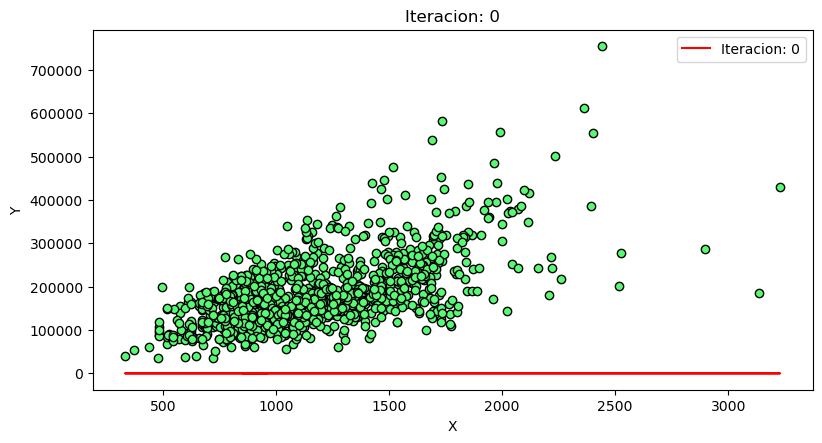

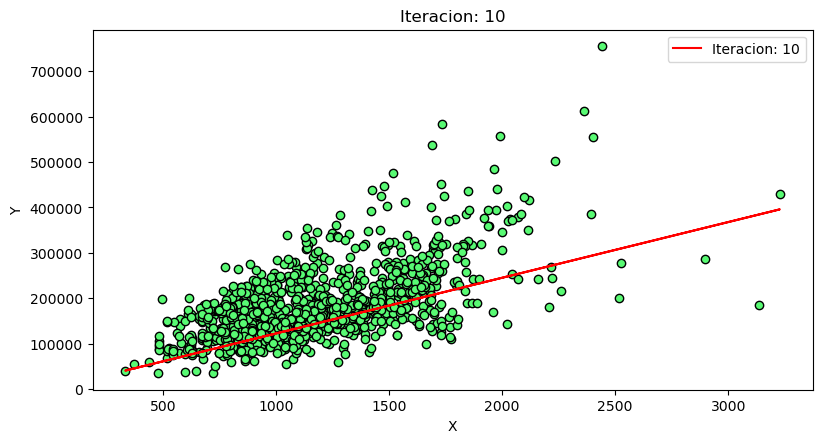

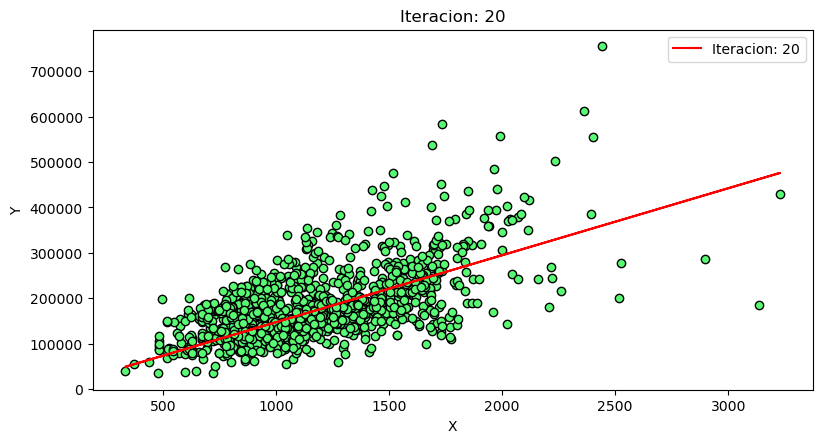

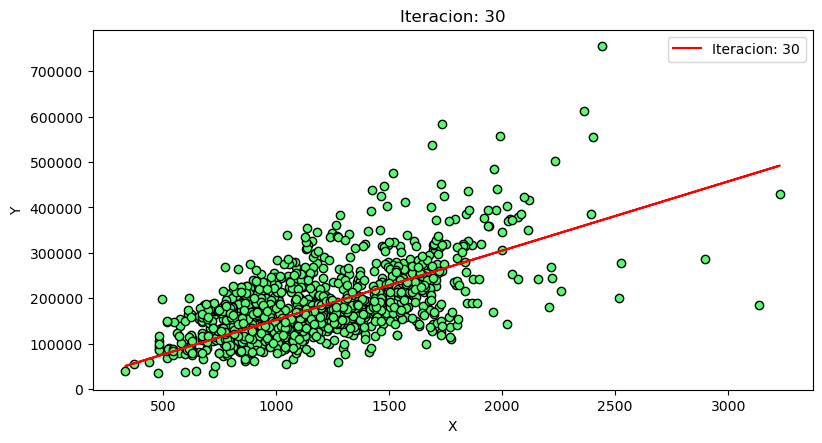

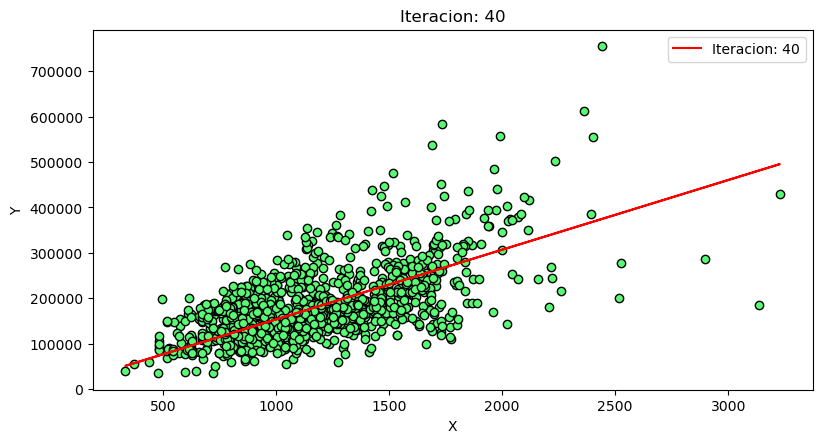

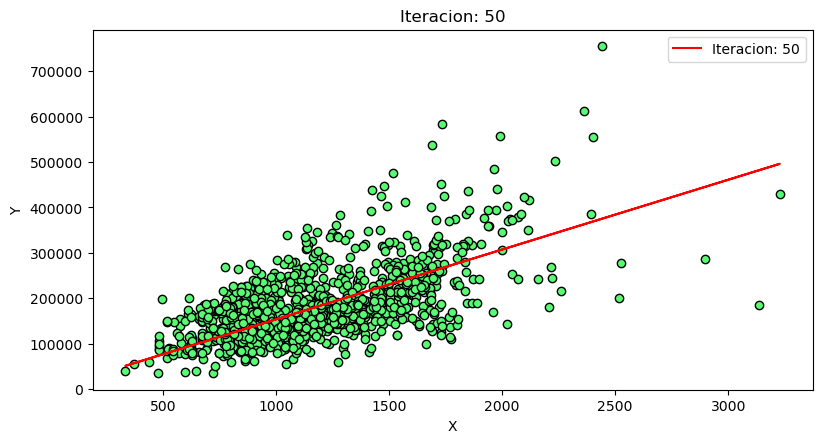

In [9]:
Epoch = 51
Imprimir = 10
Escalar = 0.0000001

modelo2 = regresion(FlrSF,SalesP,Epoch,Imprimir,Escalar)
ResModel2 ,ResErrores2 = modelo2.EntrModelo()
regresion.error(ResErrores2)
regresion.evolucion(ResModel2,Imprimir)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

SKL_OverallQual = LinearRegression()
SKL_OverallQual.fit(OverallQual,SalesP)
SKL_FlrSF = LinearRegression()
SKL_FlrSF.fit(FlrSF,SalesP)

LinearRegression()

In [11]:
PruebasOverallQual = np.reshape(np.array(DFPRUEBAS['OverallQual']),(-1,1))
PruebasFlrSF = np.reshape(np.array(DFPRUEBAS['1stFlrSF']),(-1,1))


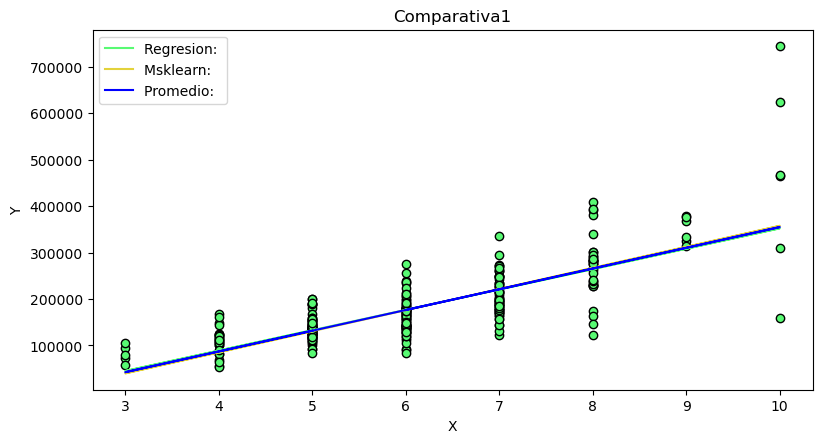

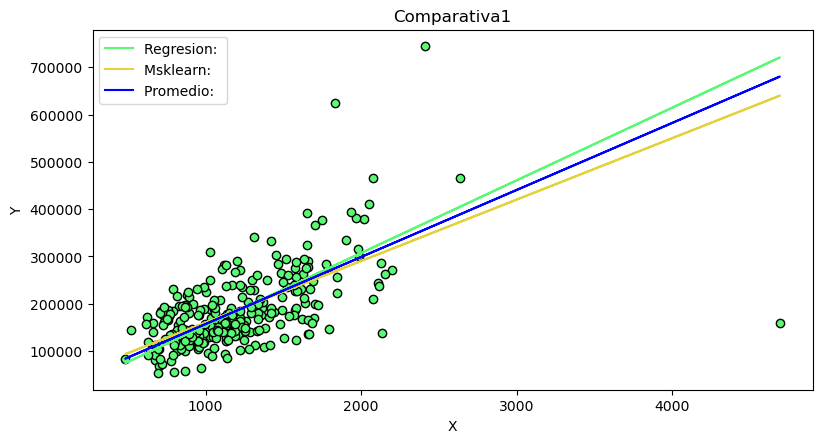

In [12]:
CompModOverallQual=regresion.comparaprediccion(modelo1,SKL_OverallQual,PruebasOverallQual,DFPRUEBAS)
CompModFlrSF=regresion.comparaprediccion(modelo2,SKL_FlrSF,PruebasFlrSF,DFPRUEBAS)


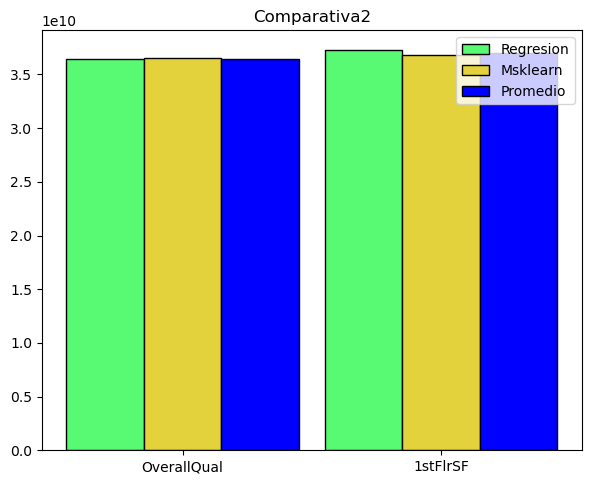

In [15]:
regresion.comparaErrores(CompModOverallQual,CompModFlrSF,PruebasOverallQual,PruebasFlrSF,DFPRUEBAS)